# Introduction to Computer Programming and Numerical Methods

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Ordinary Differential Equations

1. [**Basics of Differential Equation**](#s1)
2. [**Numerical Solutions to First-Order ODEs**](#s2)
3. [**Error in Numerical Solutions**](#s3)
4. [**System of ODEs**](#s4)
5. [**Higher-Order ODEs**](#s5)
***

# 0. Motivation

A differential equation is a mathematical equation that relates a function to its derivative(s). These equations emerge when the rate of change (i.e., the derivative) is related to the function itself and/or its independent variable(s). Differential equations are fundamental in almost all disciplines, with the most common examples found in physics and engineering. Consider, for example, Newton's second Law: $F=ma$, where $F$ is a force acting on an object, $m$ is the mass of the object, and $a$ is its acceleration. Recall that $a=v'=s''$, where $v$ is the velocity and $s$ is the displacement. Thus, Newton's second law can be rewritten as $F=mv'$ or $F=ms''$, both of which are differential equations. The objective when working with differential equations is to find the unknown function that satisfies the relationship between a function and its derivatives, such as determining the position of an object over time.

In introductory physics courses, you likely studied the motion of an object under a constant force and without friction, such as the free fall of an object under gravity, assuming no air resistance. In these simple cases, a neat analytical solution can be obtained for $a$, $v$, and $s$, as a function of time. However, this scenario is a simplification and does not accurately represent real-world conditions. It only takes minor changes, such as adding friction or considering interactions between multiple objects, for the differential equations derived from Newton's second law to become significantly more complicated and often impossible to solve using analytical methods. For example, consider the motion of an object orbiting a much heavier central body, such as the moon orbiting Earth, driven by gravitational forces. Even with just two celestial bodies, solving for the position of the moon analytically is not trivial. Now, imagine the complexity of the differential equations needed to model the interactions within our entire solar system or even our galaxy! The resulting differential equations often have no analytic solutions, and the only way to determine how the positions of the bodies evolve over time is through numerical methods.

<br>
<center><figure>
    <table><tr>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Animation_of_Moon_orbit_around_Earth.gif?20181102152516" style="width:100%">
        <br>
      </p> 
    </td>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="https://upload.wikimedia.org/wikipedia/commons/0/0e/Animation_of_THEMIS-B_trajectory_-_Trans-lunar_injection.gif" style="width:100%">
        <br>
      </p> 
    </td>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="https://upload.wikimedia.org/wikipedia/commons/b/bd/Animation_of_Rosetta_trajectory.gif" style="width:100%">
        <br>
      </p> 
    </td>
    </tr></table>
    <figcaption style="text-align:center"><strong>Examples of <a href="https://commons.wikimedia.org/wiki/File:Animation_of_Moon_orbit_around_Earth.gif">(a) two-object</a>, <a href="https://commons.wikimedia.org/wiki/File:Animation_of_THEMIS-B_trajectory_-_Trans-lunar_injection.gif">(b) three-object</a>, and <a href="https://commons.wikimedia.org/wiki/File:Animation_of_Rosetta_trajectory.gif">(c) multi-object</a> motion</strong></figcaption>  
</figure></center> 
<br>

Exact solutions to differential equations are often too difficult to obtain or may not exist because many functions cannot be integrated analytically. Therefore, numerical methods are essential as they allow us to approximate these solutions, making them practical for designing and understanding engineering and scientific systems. This section will focus on numerical solutions to a specific subset of differential equations: ordinary differential equations (ODEs) with specified initial values, commonly known as initial value problems (IVPs).

**Learning objectives:**

- Recognize the challenges associated with analytical solutions to differential equation in real-world problems
- Understand the practical significance of numerical solution to differential equations
- Describe the general approach of numerical methods for solving differential equations
- Implement different numerical methods including, Euler's, Midpoint, Heun's, and RK4 methods in Python
- Estimate the order of the error of these numerical solution methods and choose the most accurate method
- Discuss the error and spacing trade-off in numerical solutions and how very small spacing can result in increased computation time
- Rewrite a system of differential equations in matrix form and implement any of the numerical methods to solve it
- Reduce a higher-order differential equation to a system of first-order differential equations and implement any of the numerical methods to solve it

# 1. Basics of Differential Equations <a id="s1"></a>

This section gives a very brief review of some of the basics of differential equations, which you might be familiar with from previous courses. An important part of differential equations is the symbolic language (notation). We will use different notations, based on what is most relevant for each problem. Below are some notation conventions:

* Unknown function: $f(x)$, $y$, ...
* Values of the function: $f(x_{i+1})$, $f(x_i+h)$, $y_{i+1}$, ...
* Derivatives:
    * **First order**: $\ \ \ \ \ f'(x)$,  $\ f^{(1)}(x)$, $\ \dfrac{df(x)}{dx}$, $\ \ \ \ \dot{f}$, $\ y'$, $\ y^{(1)}$, $\ \dfrac{dy}{dx}$, $\ \ \ \dot{y}$, ...
    <br>
    * **Second order**: $f''(x)$,  $\ f^{(2)}(x)$, $\ \dfrac{d^2f(x)}{dx^2}$, $\ \ddot{f}$, $\ y''$, $\ y^{(2)}$, $\ \dfrac{d^2y}{dx^2}$, $\ \ddot{y}$, ...
    <br>
    * Similarly for higher order derivatives 
    
    <br>
    
* Independent variable: $x$, $t$, ...

## 1.1. Definition of Differential Equations

In various engineering and scientific disciplines, there are two main types of equations: algebraic and differential.

**Algebraic Equations:** An algebraic equation involves basic operations like addition, subtraction, multiplication, and division of a variable, often with polynomials, such as $f(x) = 2x^2 + 3x - 5 = 0$. Solving an algebraic equation means finding specific values, known as roots, that satisfy $f(x) = 0$. In this case, the unknown represents distinct numerical values for $x$.

**Differential Equations:** Conversely, a differential equation relates functions and their derivatives, such as $f''(x) + 2f'(x) + f(x) = 0$. Solving a differential equation means finding the function(s) that satisfy it. Unlike algebraic equations, the unknown in a differential equation is an entire function, making the solution process more challenging.

## 1.2. Types of Differential Equations

Differential equations can be classified into two main types based on the number of independent variables: ordinary and partial.

**Ordinary Differential Equations (ODEs):** ODEs involve an unknown function and its derivatives with respect to a *single independent variable*. An example is $f''(x) + 2f'(x) + f(x) = 0$, where there is a single independent variable $x$. In general, ODEs consider how the function varies across a single dimension, such as time or a single spatial dimension.

**Partial Differential Equations (PDEs):** Conversely, PDEs involve unknown functions and their partial derivatives with respect to *several independent variables*. An example is $x\dfrac{\partial f(x, t)}{\partial x} + t\dfrac{\partial f(x, t)}{\partial t} - f(x, t) = 0$, where there are two independent variables $x$ and $t$. In general, PDEs consider how the function varies across multiple dimensions simultaneously, such as time and space or multiple spatial dimensions ($x$, $y$, and $z$).

<br>

In this section, we only focus on ODEs.

Differential equations can also be classified based on their linearity. An ODE is linear if the unknown function and its derivatives appear only to the first power and are not multiplied by each other. If the functions and/or derivatives are raised to a power other than one or are multiplied by each other, the ODE is nonlinear.

* *Examples of linear ODEs:*
    * $f''(x) + 2f'(x) + f(x) = 0$ $\newline$
    * $f''(x) + f(x) + e^x = 0$

$\newline$
* *Examples of nonlinear ODEs:*
    * $f''(x) + 2f'(x) + f^2(x) = 0$ $\newline$
    * $f''(x) + 2f'(x)f(x) = 0$ $\newline$
    * $f'(x) = \cos(f(x))$


## 1.3. Order of Differential Equations

The order of a differential equation is determined by the *highest derivative* present in the equation. Here are some examples:

* *First order* (the highest derivative is first): $\newline$
    * $\dfrac{dy}{dt} = 3t + 2$ $\newline$
    * $\dfrac{dy}{dt} = y^2 + 3t + 2$

$\newline$ 
* *Second order* (the highest derivative is second): $\newline$
    * $\dfrac{d^2y}{dt^2}+ 2 \dfrac{dy}{dt}+y = 0$
    
    
## 1.4. Initial Value Problem   

An Initial Value Problem (IVP) is a specific type of differential equation that includes initial conditions. These initial conditions provide the starting values for the unknown function and its derivatives at a particular point. An example of an initial condition could be a known value of the function at $t=0$, $y_0$. Solving an IVP involves finding a function that satisfies the given differential equation and also aligns with the initial conditions.

**General Solution:** The general solution of a differential equation represents the family of all possible solutions without specifying particular values for any arbitrary constants that may arise during the solving process. For example, for the differential equation $y' = y$, we need to find a function such that its first derivative is equal to the function itself. An obvious solution in this case is $y = C e^t$, where $C$ is some arbitrary constant. This solution is known as a general solution because it involves an arbitrary constant.

**Particular Solution:** A particular solution is derived from the general solution by assigning particular values to the arbitrary constants based on additional information, such as initial conditions. For instance if we know that $y(t=0)=y_0=5$, then substituting the initial condition into the general solution $y = C e^t$, gives $5=C e^0$ implying $C=5$. Hence, the particular solution is $y= 5 e^t$. This solution satisfies both the differential equation $y'=y$ as well as the initial condition $y_0=5$.

In the next section, we will explore various numerical methods for approximating the solutions to initial value problems. While IVPs may involve more than just differential equations in time, we will predominantly focus on time as the independent variable for simplicity. Additionally, we will utilize different notations for the unknown function and its derivatives, adapting them based on the specific context, as previously mentioned.

# 2. Numerical Solutions to First Order ODEs <a id="s2"></a>

The primary objective when dealing with differential equations is to determine the unknown function $y$ that satisfies the relationship between the function itself and its derivatives. An analytic solution is a mathematical function that, when substituted into the differential equation, results in a true statement. For instance, in the previous example $y'=y$, it was easy to find an analytic solution: $y=5e^t$. If an analytic solution exists, there is no need to use any of the numerical techniques we will discuss. However, obtaining analytic solutions for many differential equations is often challenging or impossible, making numerical methods necessary. Therefore, we focus on finding approximate numerical solutions. But what exactly is a *numerical solution*?

A numerical solution involves computing a sequence of approximate values for the unknown function at various points in time or space. For instance, a numerical solution might consist of $y(t=0)=5$, $y(t=0.2)=6$, $y(t=0.4)=7.2$, $y(t=0.6)=8.6$, and so on. It is called a numerical solution because it consists of numbers rather than a mathematical expression. Typically, the numerical solution is visualized, and by estimating the solution at small intervals, the numeric results effectively resemble a function.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSRz0aUJNSDz-Wf-IoLB6kXIwaoyH8fv2xv60cYl6C5XMe_q_uC4im9sWRFMCUggW8PbJ1XYcRye0fU/pub?w=648&h=432
" style="width:45%">
    <figcaption style="text-align:center"><strong>Analytic versus numeric solution</strong></figcaption>   
</figure></center>

Accordingly, numerical methods require dividing the domain (typically time) into $N$ subintervals or steps, each with step size $h$, similar to the process used in numerical integration. The solution is then computed through iteration. Starting from the initial condition $(t_0, y_0)$, we take a step forward and estimate $(t_1, y_1)$. Then using $(t_1, y_1)$, we take another step forward and estimate $(t_2, y_2)$, continuing this process until we estimate the solution at the final time step $(t_f, y_f)$.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSOPfvz36FaK7TmIPCh8ho7hMqFctk-TJUNnLtxP0WOE5mmPjIHgIsUYOU6-Ywufdff4y3DNPAViYEE/pub?w=961&h=348
" style="width:40%">
    <figcaption style="text-align:center"><strong>Numerical solution time grid</strong></figcaption>   
</figure></center>

<br>

<div class="alert alert-block alert-warning"> 
    <b>NOTE!</b> By dividing the domain $[t_0, t_f]$ into $N$ subintervals, we can show the following relations: 
    <table style="width: 100%; border-collapse: collapse; background-color: #fff3cd;">
        <tr>
            <td style="text-align: center; padding: 10px; background-color: #fff3cd;">$$h = \dfrac{t_f-t_0}{N}$$</td>
            <td style="text-align: center; padding: 10px; background-color: #fff3cd;">$$t_{i+1}=t_i+h$$</td>
            <td style="text-align: center; padding: 10px; background-color: #fff3cd;">$$t_f = t_0 + hN$$</td>
        </tr>
    </table>
</div>

The numerical methods we will explore share a common approach of estimating a future value $y_{i+1}$ using the known current value $y_i$. But how do we estimate $y_{i+1}$ from $y_i$? If we use a small step size $h$, the function $y$ can be approximated as a linear function between two successive points $(t_i, y_i)$ and $(t_{i+1}, y_{i+1})$. Under this assumption, all we need is the slope of the linear function to be able to estimate the value at $(t_{i+1}, y_{i+1})$ from $(t_i, y_i)$. From the figure below, it becomes evident that $y_{i+1} = y_i + h \times slope$.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vRhDse7IHEMLugFYNXje7qPZQLiQCxlstAj3XO30TlSVdOc1YX59NEBU3hzydU4CmmSG52SdVUdU1U3/pub?w=1152&h=864
" style="width:45%">
    <figcaption style="text-align:center"><strong>Calculating $y_{i+1}$ from $y_i$</strong></figcaption>   
</figure></center>

<br>

<div class="alert alert-block alert-warning"> <b>NOTE!</b> The linear function between $(t_i, y_i)$ and $(t_{i+1}, y_{i+1})$, while reasonable for a small step size $h$, is still an approximation. If the actual function is nonlinear, which is generally the case, this approximation will introduce error. We will discuss the order of the error and how to control it later.</div>

To estimate the value at $(t_{i+1}, y_{i+1})$ from $(t_i, y_i)$, we need a value for the slope of the assumed linear function. So, what should we use for the slope? 

We will focus on solving first-order ODEs and then discuss solutions to higher-order ODEs next. Since we are working with differential equations, we have a procedure for determining the value of the slope. Geometrically, the slope of the tangent line is the derivative of a function. To utilize this concept, we can rearrange the differential equation to isolate the first derivative $y'$ on one side, and move everything else to the other side. This rearrangement allows us to express the slope of the function explicitly in terms of the other variables involved as:

$$slope = y' =F(t, y)$$

where $F$ is a known function that returns the derivative, $t$ is the independent variable, and $y$ is the unknown function we are trying to solve for.

**Examples:**
* $y'-y-t=0 \rightarrow y'=y+t \rightarrow F(t,y) = y+t$ 
<br>

* $y' + 0.1(y-75) \rightarrow y'= -0.1(y-75) \rightarrow F(t,y) = -0.1(y-75)$
<br>

* $1000y' + 200y -500=0 \rightarrow y'=-0.2y+0.5 \rightarrow F(t,y) = -0.2y+0.5$
<br>

For all of the methods we will discuss, we will use the following equation iteratively to find the numerical solution:

$$y_{i+1} = y_i + h \times slope = y_i + h \times F(t,y)$$

The critical part is determining what to use for the slope (or equivalently, the derivative). There are different methods for approximating the slope, which influence the accuracy of the predictions. We will discuss the following methods:

1. **Euler's Method:** Uses the slope at the current point $(t_i, y_i)$

2. **Midpoint Method:** Uses the slope at the midpoint of the interval $(t_{i+1/2}, y_{i+1/2})$, where $t_{i+1/2} = t_i + h \ / \ 2$

3. **Heun's Method:** Uses the average of the slopes at the current point $(t_i, y_i)$ and the predicted point $(t_{i+1}, y^*_{i+1})$

4. **Fourth Order Runge-Kutta Method:**  Uses a weighted average of four slopes at several points

## 2.1. Euler's Method

Euler's Method is a simple numerical technique that approximates the solution of a first-order ODE using the slope at the current point $(t_i, y_i)$ (left endpoint of each subinterval). The key idea is to approximate the slope of the function between $(t_i, y_i)$ and $(t_{i+1}, y_{i+1})$ using the derivative at the current point, $y'_i$.

<div class="alert alert-block alert-warning"> <b>NOTE!</b> When using Euler's method, not only are we assuming that the function between $(t_i, y_i)$ and $(t_{i+1}, y_{i+1})$ is linear, but also that the slope of this linear function is equal to $y'_i$, which is the slope at the left endpoint. However, this is generally not the case, as the actual function is usually not linear and the slope can vary between these points. These assumptions contribute to the error in numerical solutions.</div>

Recall that we have the first order ODE $y'=F(t, y)$, where $F$ is the derivative function. If we know the values for the current point $(t_i, y_i)$, we can substitute them into the differential equation to obtain the value of the slope at the current point: $y'_i = F(t_i, y_i)$. Using this slope, Euler's Method provides a numerical approximation for the next point as:

$$y_{i+1} = y_i + h \times F(t_i, y_i)$$

We can also obtain the same equation for $y_{i+1}$ by rearranging the forward difference equation (refer to the notes on differentiation):

$$
y'_i \approx \frac{y_{i+1} - y_i}{h} \rightarrow y_{i+1} = y_i+hy'_i = y_i + h \times F(t_i, y_i)
$$

The general steps are as follows:
* Set the initial condition: $t_0, y_0$
* Compute $y_{1} = y_0 + h F(t_0, y_0)$
* Compute $y_{2} = y_1 + h F(t_1, y_1)$
* Continue the process until the endpoint is reached

<br>
<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vQfkSx9tztq5leLlz1hadNbRqb0DwJTTieBtyQTYmDW9tSHLQsbOmppLrok8r7EBj-BOslYG2LXmQJJ/pub?w=1872&h=576
" style="width:100%">
    <figcaption style="text-align:center"><strong>Graphical illustration of Euler's method</strong></figcaption>
</figure></center>
<br>

A pseudocode describing the steps is shown below. The variables in the pseudocode are:
* $t$: independent variable (time)
* $y$: dependent variable (solution)
* $F$: the derivative function
* $t_0$: initial time
* $y_0$: initial value of $y$
* $t_f$: final time
* $N$: number of steps

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSfayVuvo3vA4yagfqGcKSpa_bz_ypQZlL24y0asGJl-gy0SnPcfGwcO7NgoRTHiTpwMsD2TrmLgvgC/pub?w=1440&h=593
" style="width:65%">
</figure></center>

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>my_Euler(F, t0, y0, tf, N)</code> which takes as input a function object <code>F</code> and four scalar values <code>t0, y0, tf, N</code>. The function should return two arrays (in this order): the time grid and corresponding numerical solution using Forward Euler's method. The solution should be evaluated at <code>N+1</code> points between <code>[t0, tf]</code>, inclusive. Note that <code>F(t, y)</code> is a function that returns the value of the first derivative $y'=F(t, y)$ for specified values of <code>t</code> and <code>y</code>.</div>

In [10]:
def my_Euler(F, t0, y0, tf, N):
    t = np.linspace(t0, tf, N+1)
    h = (tf - t0) / N
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(1, N+1):
        y[i] = y[i-1] + h * F(t[i-1], y[i-1])

    return t, y

Let's consider an example of the cooling of a cup of coffee in a room with an ambient temperature. The rate of change of the coffee's temperature $T$ with respect to time $t$ can be modeled by the first-order ordinary differential equation:

$$\dfrac{dT}{dt} = -k(T - T_{\text{ambient}})$$

where:
- $T$ is the temperature of the coffee,
- $t$ is time,
- $T_{\text{ambient}}$ is the ambient temperature of the room,
- $k$ is a positive constant representing the cooling rate.

Assume $T_{\text{ambient}} = 75^\circ \text{F}$, $T_0 = 200^\circ \text{F}$ (initial temperature of the coffee at $t=0$), and $k = 0.1 \text{ min}^{-1}$ (cooling rate).

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Use your function <code>my_Euler()</code> to find the temperature of the cup of coffee at $t = 30$ min. Try different number of steps. Plot the result and compare it with the analytic solution provided below.</div>

The analytic solution to this differential equation is:

$$T(t) = T_{\text{ambient}} + (T_0 - T_{\text{ambient}})e^{-kt}$$

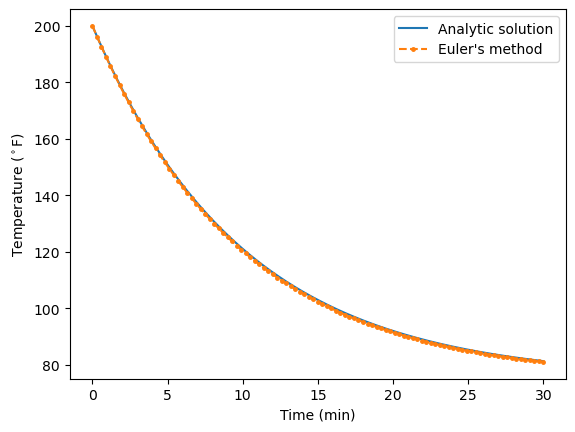

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Given
t0, T0, tf, k, T_amb, N = 0, 200, 30, 0.1, 75, 10**2

# Define y' = F
F = lambda t, T: -k*(T - T_amb)

# Numerical solution
sol = my_Euler(F, t0, T0, tf, N)

# Analytic solution 
T_excat = lambda t: T_amb + (T0 - T_amb) * np.exp(-k*t)
t = np.linspace(t0, tf, 1001)
sol_exact = T_excat(t)

# Plot results
plt.figure(dpi=100)
plt.plot(t, sol_exact, label="Analytic solution")
plt.plot(sol[0], sol[1], '.--', label="Euler's method", ms=5)
plt.ylabel(r'Temperature ($^\circ$F)')
plt.xlabel('Time (min)')
plt.legend()
plt.show()

In Euler's method, we used the derivative at the left endpoint $y'_i$ as an estimate of the slope over the entire region between $t_i$ and $t_{i+1}$. As we have seen, this method can lead to errors, particularly in regions with high curvature, where the slope at the left endpoint does not accurately represent the entire interval's behavior. If you could choose a different point that better represents the slope over the interval, which point would you choose?

## 2.2. Midpoint Method

The Midpoint Method improves the accuracy by approximating the solution of a first-order ODE using the slope at the midpoint of each subinterval $(t_{i+1/2}, y_{i+1/2})$, where $t_{i+1/2}=t_i+h\ /\ 2$. The key idea is to first take a half step with Euler's method to approximate the solution at $t_{i+1/2}$. We then go back to the point $(t_i, y_i)$ and take a full step using the derivative at the midpoint, $y'_{i+1/2}$, to estimate the solution at $t_{i+1}$.

Recall that we have the first order ODE $y'=F(t, y)$, where $F$ is the derivative function. It follows that the slope at the midpoint is $y'_{i+1/2} = F(t_{i+1/2}, y_{i+1/2})$. Using this slope, the Midpoint Method provides a numerical approximation for the next point as:

$$y_{i+1} = y_i + h \times F(t_{i+1/2}, y_{i+1/2})$$

The general steps are as follows:
* Set the initial condition: $t_0, y_0$
* Compute the midpoint (intermediate step): $y_{1/2} = y_0 + \frac{h}{2} F(t_0, y_0)$
* Compute $y_{1} = y_0 + h F(t_{1/2}, y_{1/2})$
* Compute the midpoint (intermediate step): $y_{1+1/2} = y_1 + \frac{h}{2} F(t_1, y_1)$
* Compute $y_{2} = y_1 + h F(t_{1+1/2}, y_{1+1/2})$
* Continue the process until the endpoint is reached

<br>
<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vT6evWL5oyQIzq413aZ34NR__Lpj0HQQx2hotoert8lkK-64vpRUldmlMW_HLSY9UxF953pRgR2yIwY/pub?w=1872&h=1152
" style="width:100%">
    <figcaption style="text-align:center"><strong>Graphical illustration of Midpoint method</strong></figcaption>
</figure></center>
<br>

A pseudocode describing the steps is shown below. The variables in the pseudocode are:
* $t$: independent variable (time)
* $y$: dependent variable (solution)
* $F$: the derivative function
* $t_0$: initial time
* $y_0$: initial value of $y$
* $t_f$: final time
* $N$: number of steps
* $y\_int$: value at intermediate step, $y_{i+1/2}$

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vRHlcOs8-K74zttzo4pI6_vrLMBHZzyFgYrxncAahjqZCFF3qC03jpp4QKdiuwlIu-XZlLZjeB88z1l/pub?w=1440&h=624
" style="width:65%">   
</figure></center>

## 2.3. Heun's Method

Instead of using the slope at the midpoint, $y'_{i+1/2}$, Heun's method improves the accuracy by averaging the slopes at the current $(t_{i}, y_{i})$ and the predicted point $(t_{i+1}, y^*_{i+1})$. The key idea is to first take a full step with Euler's method to approximate an intermediate solution at $t_{i+1}$. We then go back to the point $(t_i, y_i)$ and take a full step again but this time using the average of the derivatives at the left and right endpoints to estimate a better solution at $t_{i+1}$.

Recall that we have the first order ODE $y'=F(t, y)$, where $F$ is the derivative function. Using Euler's method, we can compute an intermediate or predictor solution for the next step as:

$$y^*_{i+1} = y_i + h \times F(t_{i}, y_{i})$$

However, unlike Euler's method, this is not the final solution for $y_{i+1}$. Now that we have an estimated point $(t_{i+1}, y^*_{i+1})$, we can get an estimate of the slope at the right endpoint: $F(t_{i+1}, y^*_{i+1})$. Then, we take the average of the slope at the left endpoint and that at the predicted right endpoint. Using this average slope, Heun's Method provides a final numerical approximation for the next point as:

$$y_{i+1} = y_i + h \times \dfrac{F(t_{i}, y_{i})+ F(t_{i+1}, y^*_{i+1})}{2}$$

The general steps are as follows:
* Set the initial condition: $t_0, y_0$
* Compute the intermediate/predictor step: $y^*_{1} = y_0 + h F(t_0, y_0)$
* Compute the final/corrector step: $y_{1} = y_0 + \frac{h}{2}  [F(t_{0}, y_{0}) + F(t_{1}, y^*_{1})]$
* Compute the intermediate/predictor step: $y^*_{2} = y_1 + h F(t_1, y_1)$
* Compute the final/corrector step: $y_{2} = y_1 + \frac{h}{2}  [F(t_{1}, y_{1}) + F(t_{2}, y^*_{2})]$
* Continue the process until the endpoint is reached

<br>
<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vTBA8ZpSTdQ-bKNAzBaZdRbMkJBxKGDOy18DT_Ll0gDbZU5-S_s6c92HKjK9x9HEH8LeUd6HEYgZBI8/pub?w=1872&h=1152
" style="width:100%">
    <figcaption style="text-align:center"><strong>Graphical illustration of Heun's method</strong></figcaption>
</figure></center>
<br>

A pseudocode describing the steps is shown below. The variables in the pseudocode are:
* $t$: independent variable (time)
* $y$: dependent variable (solution)
* $F$: the derivative function
* $t_0$: initial time
* $y_0$: initial value of $y$
* $t_f$: final time
* $N$: number of steps
* $y\_int$: value at intermediate step, $y^*_{i+1}$

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSpOm43PmbWNsIotgOKMkHRiJOqwplljLClXqs6-CJpLfzJx2JA6fYRU0dacROYQqVoi7vB4RKLVbOj/pub?w=1439&h=639
" style="width:65%">  
</figure></center>

## 2.4. Runge-Kutta 4 Method

One of the challenges of numerical solutions is using a slope (derivative) that accurately captures the overall behavior of the function between $t_i$ and $t_{i+1}$. Recall that Euler's method evaluates the slope at the left endpoint of each subinterval, the Midpoint method uses the slope at the midpoint of each subinterval, and Heun's method takes the average of the slopes at the left and right endpoints.

What if we use a technique that combines the ideas of Euler's, Midpoint, and Heun's methods by evaluating the slope at several points over each subinterval? By evaluating the slope at several points and then taking a weighted average, we can come up with a slope that better reflects the overall behavior between $t_i$ and $t_{i+1}$.

The Runge-Kutta (RK) methods follow this approach. RK methods are a family of iterative methods with many variations, ranging from simpler lower-order methods to more complex higher-order methods. The Fourth Order Runge Kutta (RK4) method is one of the most commonly used methods for solving ODEs. It provides a more accurate solution by considering the slopes at four different points within each subinterval:

1. Left endpoint slope ($k_1$): This is the slope at the beginning of the subinterval, similar to Euler's method.
2. Midpoint slope ($k_2$): This slope is calculated at the midpoint of the subinterval, using $k_1$ to estimate the value at the midpoint, $y_{i+1/2}$, similar to the Midpoint method.
3. Midpoint slope ($k_3$): This is another midpoint slope, but it uses the slope from the midpoint $k_2$ to refine the function's estimated value at the midpoint, $y_{i+1/2}$.
4. Right endpoint slope ($k_4$): This slope is evaluated at the end of the subinterval, using $k_3$ to estimate the function's value at this endpoint, $y^*_{i+1}$.

The RK4 method then takes a weighted average of these four slopes to determine the overall slope for the interval, where middle points are assigned higher weight compared to the endpoints. Using this weighted slope, RK4 Method provides a final numerical approximation for the next point as:

$$
y_{i+1} = y_i + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)
$$

where:

$$
\begin{eqnarray*}
k_1 & = & F(t_i,y_i)\\
k_2 & = & F\left(t_i+\tfrac{h}{2},y_i+\tfrac{h}{2}k_1\right)\\
k_3 & = & F\left(t_i+\tfrac{h}{2},y_i+\tfrac{h}{2}k_2\right)\\
k_4 & = & F(t_i+h,y_i+hk_3)
\end{eqnarray*}
$$

The general steps are as follows:
* Set the initial condition: $t_0, y_0$
* Compute $k_{1} = F(t_0, y_0)$
* Compute $k_{2} = F(t_0+\frac{h}{2}, y_0+\frac{h}{2}k_1)$
* Compute $k_{3} = F(t_0+\frac{h}{2}, y_0+\frac{h}{2}k_2)$
* Compute $k_{4} = F(t_0+h, y_0+hk_3)$
* Compute $y_{1} = y_0 + \frac{h}{6}  (k_1+2k_2+2k_3+k_4)$
* Continue the process until the endpoint is reached

# 3. Error in Numerical Solutions <a id="s3"></a>

Similar to numerical differentiation and integration, numerical solutions to differential equations are also subject to errors. Understanding the accuracy of these methods and the magnitude of the error is crucial for their reliable application. Mathematically, the error in numerical solutions refers to the difference between the exact solution at a time step and the approximated numerical solution at that time step. The error is mainly caused by the assumptions used in numerical methods, specifically, assuming a linear function between two successive time steps and approximating the value of the slope of that function using the derivative at one or multiple points.

As the step size $h$ decreases, the numerical results tend to converge to the true values of the function that satisfies the differential equation. However, even with the same step size $h$, different numerical methods exhibit different levels of accuracy. Theoretically, methods that evaluate the slope at the midpoint of the interval and those that use multiple points to approximate the slope are more accurate.

## 3.1. Order of Error

Calculating the exact error is generally not possible, as this requires knowing the true value of the function, which is usually unknown in real applications. Instead, we estimate the order or magnitude of the error using Big-O notation as a function of the step size $h$. The table below summarizes the order of the error associated with various numerical integration methods:

| Method          | Error                         |
|:----------------|:------------------------------|
| Euler's Method  | $\mathcal{O}\left(h\right)$   |
| Midpoint Method | $\mathcal{O}\left(h^2\right)$ |
| Heun's Method   | $\mathcal{O}\left(h^2\right)$ |
| RK4 Method      | $\mathcal{O}\left(h^4\right)$ |

Because we are focusing on small values of $h$, higher-order methods, for which the exponent $k$ in $\mathcal{O}\left(h^k\right)$ is larger, tend to have smaller error and thus are more accurate (since for small values of $h$ like 0.01, $h^2$ will be smaller, $h^4$ even smaller than that, and so on, making higher-order methods more accurate for small step sizes).

## 3.2. Error and Spacing Trade-off 

Similar to numerical differentiation and integration, choosing a smaller step size $h$ improves the accuracy of numerical solution for differential equations. However, this increased accuracy comes at the cost of greater computational demands, including longer processing times and higher memory requirements, as well as potentially more significant round-off errors. When subdividing the solution domain $[t_0, t_f]$ into $N$ subintervals each with step size $h$, increasing $N$ or equivalently decreasing $h$, increases the number of values $y_i$ that must be computed. This added complexity leads to longer computation times. Therefore, a balance between acceptable error and step size is crucial.

Below is a summary of the fourth methods:

| **Aspect** | **Euler's Method** | **Midpoint Method** | **Heun's Method** | **RK4 Method** |
|---------------------------|-----------------------------------------------------|-----------------------------------------------------|-----------------------------------------------------|-----------------------------------------------------|
| **Basic Idea** | Uses the slope at the current point | Uses the slope at the midpoint of the interval  | Uses the average of the slopes at the current and predicted point | Uses a weighted average of slopes at four points |
| **$y_{i+1} =$** | $ y_i + hk_1 $ | $y_i + hk_2 $ | $ y_i + \frac{h}{2} \left(k_1 + F\left(t_i + h, y_i + hk_1\right)\right) $ | $ y_i + \frac{h}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right) $|
| **Order of Accuracy**     | $\mathcal{O}\left(h\right)$ | $\mathcal{O}\left(h^2\right)$ | $\mathcal{O}\left(h^2\right)$ | $\mathcal{O}\left(h^4\right)$ |
| **Computational Complexity** | Low (requires a single slope calculation) | Moderate (requires midpoint evaluation) | Moderate (requires averaging slopes)  | High (requires multiple slope evaluations) |
| **Error Characteristics** | High error due to assuming constant slope over each interval  | Lower error by accounting for slope at midpoint | Lower error by averging slopes | Very small error due to multiple slope approximations  |
| **Typical Usage** | Simple problems, educational purposes  | Moderate accuracy with manageable complexity | Useful for moderate accuracy and stability | Ideal for high-accuracy scientific computations |
| **Stability**  | Limited stability; sensitive to step size | More stable than Euler's method | More stable than Euler's method | Highly stable for a wide range of problems |
| **Implementation Ease**  | Easy and straightforward | Slightly more complex; involves midpoint evaluation | Moderate; requires averaging and additional steps | Most complex; involves multiple evaluations and coefficients |

where:

$\begin{eqnarray*}
k_1 & = & F(t_i,y_i)\\
k_2 & = & F\left(t_i+\tfrac{h}{2},y_i+\tfrac{h}{2}k_1\right)\\
k_3 & = & F\left(t_i+\tfrac{h}{2},y_i+\tfrac{h}{2}k_2\right)\\
k_4 & = & F(t_i+h,y_i+hk_3)
\end{eqnarray*}$

# 4. System of ODEs <a id="s4"></a>

So far, we have discussed numerical solutions to first-order ODEs for a single dependent variable (i.e., unknown function). For instance, the simplified motion of the moon orbiting Earth can be represented as a single differential equation with one unknown function, namely the position of the moon. However, many real-life scenarios involve multiple functions that are interdependent. For example, when modeling the positions of multiple objects within our solar system, we encounter multiple differential equations with multiple unknown functions – one for the position of each object. These are commonly expressed as a system of differential equations.

A system of first-order ordinary differential equations arises when modeling complex dynamic situations involving multiple interacting functions. The methods we discussed for solving a single first-order ODE can be extended to a system of ODEs. This requires rewriting the equations in matrix/vector form. In general, a system of $n$ first order ODEs involving functions $f_1, f_2, \dots, f_n$ can be expressed as:

\begin{equation}
    \begin{cases}
      f_1' = F_1(t, f_1, f_2, \dots, f_n)\\
      f_2' = F_2(t, f_1, f_2, \dots, f_n)\\
      \ \vdots \\
      f_n' = F_n(t, f_1, f_2, \dots. f_n)\\
    \end{cases}       
\end{equation}

where $F_1, F_2, \dots, F_n$ are known functions that return the derivatives, $t$ is the independent variable, and $f_1, f_2, \dots, f_n$ are the unknown functions we aim to solve for.

Since we have a system of $n$ differential equations, we will require $n$ initial conditions:

$$\begin{bmatrix} f_1(t_0) = f_{1, 0} \\ f_2(t_0) = f_{2, 0} \\ \vdots \\ f_n(t_0) = f_{n, 0} \end{bmatrix}$$

<br>

Consider an example of water flow between three connected tanks. If the three water tanks initially have different water heights, water will flow from the tank with a higher water level to the tanks with lower water levels through the connecting pipes until the water levels equalize. The rate of flow will depend on the difference in water levels between the connected tanks and the properties of the connecting pipes (e.g., diameter, length, etc.). In this example, we assume that the connecting pipe between tanks 1 and 2 is wider than that between tanks 2 and 3, as illustrated below.

<br>
<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSw4tkNXwXmKLBAdmvM_4hoqx6GyzDSMQ98JLCFd73SJlQByEYbvfEndr30xZr64WjdgI7OUftxOpEj/pub?w=1435&h=669
" style="width:50%">
    <figcaption style="text-align:center"><strong>Water flow between three connected tanks</strong></figcaption>   
</figure></center>

We are interested in estimating the water height in each tank with time. Let $h_1, h_2, h_3$ be the water height at any time $t$ in tanks 1, 2, and 3, respectively. Based on certain assumed tank and pipe dimensions, the rate of change of the water height in each tank can be modeled by a system of three first-order ordinary differential equations:

\begin{cases}
  h_1' = -2h_1 + 2 h_2 \\ \\ h_2' = 2h_1 - 3 h_2 + h_3 \\ \\ h_3' = h_2 - h_3 
\end{cases}

The initial conditions are the initial water heights in each tank at time 0:

$$\begin{bmatrix} h_{1, 0} \\ h_{2, 0} \\ h_{3, 0} \end{bmatrix}$$

<br>

Similar to solving a system of algebraic equations, solving a system of differential equations requires finding a set of functions that satisfy all equations simultaneously. Since we are working with a system of equations, we will use linear algebra and express the solution in matrix form. The general approach to solving a system of differential equations is: 
1. **Formulation of the state of the system:** Begin by defining a vector $S$ of all the dependent variables (i.e., unknown functions we are trying to solve for). This is referred to as the state of the system. In general, the state of the system is given by:

$$S = \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_n \end{bmatrix}$$

2. **Formulation of the system of ODEs:** The system of the differential equations is simply $S'$:

$$S' = \begin{bmatrix} f'_1 \\ f'_2 \\ \vdots \\ f'_n \end{bmatrix} = \begin{bmatrix} F_1(t, f_1, f_2, \dots, f_n) \\ F_2(t, f_1, f_2, \dots, f_n) \\ \vdots \\ F_n(t, f_1, f_2, \dots, f_n) \end{bmatrix}$$

3. **Numerical solution:** We can then apply any of the numerical methods to solve the system. However, keep in mind that we are working with vectors/matrices. For example, Forward Euler's method would be:
$$S_{i+1} = S_i + h S'_i$$
    which translates to:
$$\begin{bmatrix} f_{1, i+1} \\ f_{2, i+1} \\ \vdots \\ f_{n, i+1} \end{bmatrix} = \begin{bmatrix} f_{1, i} \\ f_{2, i} \\ \vdots \\ f_{n, i} \end{bmatrix} + h \begin{bmatrix} F_1(t_i, f_{1, i}, f_{2, i}, \dots, f_{n, i}) \\ F_2(t_i, f_{1, i}, f_{2, i}, \dots, f_{n, i}) \\ \vdots \\ F_n(t_i, f_{1, i}, f_{2, i}, \dots, f_{n, i}) \end{bmatrix}$$

To use other numerical methods (e.g., Midpoint, Heun's, or RK4), simply replace $S'_i$ with the relevant set of derivatives for each method.

<br>

For the water flow example we discussed earlier, the above three steps would be:

1. **State of the system:** 

$$S = \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix}$$

2. **System of ODEs:**

$$S' = \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix} = \begin{bmatrix} F_1(t, h_1, h_2, h_3) \\ F_2(t, h_1, h_2, h_3) \\ F_3(t, h_1, h_2, h_3) \end{bmatrix}$$

3. **Numerical solution using Euler's method:** 

$$\begin{bmatrix} h_{1, i+1} \\ h_{2, i+1} \\ h_{3, i+1} \end{bmatrix} = \begin{bmatrix} h_{1, i} \\ h_{2, i} \\ h_{3, i} \end{bmatrix} + h \begin{bmatrix} -2h_{1, i} + 2 h_{2, i} \\ 2h_{1, i} - 3 h_{2, i} + h_{3, i} \\ h_{2, i} - h_{3, i} \end{bmatrix}$$

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>my_Euler_system(dS, t0, S0, tf, N)</code> which takes as input a function object <code>dS</code>, three scalar values <code>t0, tf, N</code>, and a NumPy array of the initial conditions <code>S0</code>. The function should return two arrays (in this order): a vector of the time grid and corresponding matrix of the numerical solution using Forward Euler's method. The solution should be evaluated at <code>N+1</code> points between <code>[t0, tf]</code>, inclusive. Note that <code>dS(ti, Si)</code> is a function that returns a NumPy array of the derivative of the state of the system evaluated at step $i$: $S'_i$.</div>

In [8]:
def my_Euler_system(dS, t0, S0, tf, N):
    t = np.linspace(t0, tf, N+1)
    S = np.zeros((3, N+1))
    S[:, 0] = S0
    h = (tf - t0) / N
    for i in range(N):
        S[:, i+1] = S[:, i] + h * dS(t[i], S[:, i])
    return t, S

Recall that for the water flow between three connected tanks, we had the following system of differential equations:

$$S = \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} \rightarrow  S' = \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix}$$

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Write a function <code>dS(ti, Si)</code> which takes as input the time at the current step <code>ti</code> and a NumPy array (row vector) of the current state <code>Si</code> based on the above system of ODEs and returns a NumPy array of the derivative of the state of the system evaluated at step $i$. Then, change the initial conditions and see how that affects the numerical solution.</div>

In [10]:
import ipywidgets as widgets  # import ipywidgets package for interactive widgets
import numpy as np
import matplotlib.pyplot as plt

# Define function dS
dS = lambda ti, Si: np.array([-2*Si[0] + 2*Si[1],
                             2*Si[0] - 3*Si[1] + Si[2],
                             Si[1] - Si[2]])

# create sliders
@widgets.interact(h1_0=(0, 10, 0.5), h2_0=(0, 10, 0.5), h3_0=(0, 10, 0.5), ti = (0, 2.5, 0.05))

# define a function that takes the values from the sliders and plots the results
def arange(h1_0, h2_0, h3_0, ti):
    
    # Get numerical solution
    sol = my_Euler_system(dS, 0, np.array([h1_0, h2_0, h3_0]), 2.5, 50)
    
    # Get index of selected time
    t_index = int(ti/0.05)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot numerical solution
    ax[0].plot(sol[0], sol[1][0], label='Tank 1')
    ax[0].plot(sol[0], sol[1][1], label='Tank 2')
    ax[0].plot(sol[0], sol[1][2], label='Tank 3')
    ax[0].plot(sol[0][t_index], sol[1][0][t_index], 'oC0', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][1][t_index], 'oC1', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][2][t_index], 'oC2', clip_on=False)
    ax[0].set(ylim=(0,10), ylabel='Water Height (m)', xlim = (0, 2.5), xlabel='Time (hr)')
    ax[0].legend()
    ax[0].set_title("Numerical Solution")
    
    # Tanks Dimensions
    tank_width = 2.99
    tank_height = 10
    
    # Current water heights
    heights = [sol[1][0][t_index], sol[1][1][t_index], sol[1][2][t_index]]

    # Plot each tank
    for i, height in enumerate(heights):
        # Calculate tank coordinates
        tank_x = i*(tank_width+0.5)
        tank_y = 0.01

        # Plot tank outline
        tank_rect = ax[1].vlines([tank_x, tank_x+tank_width], [0], [tank_height]*2,\
                                 linewidth=1, edgecolor='k')
        tank_rect = ax[1].hlines(tank_y, tank_x, tank_x+tank_width, linewidth=1, edgecolor='k')
        
        # Plot water in the tank
        water_height = min(height, tank_height)
        water_rect = plt.Rectangle((tank_x, tank_y), tank_width, water_height, \
                                   linewidth=1, facecolor='lightblue')
        ax[1].add_patch(water_rect)

    # Connect tanks with pipes at the bottom
    pipe_rect = plt.Rectangle((tank_width-0.02, 0.04), 0.58, 0.4, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
    pipe_rect = plt.Rectangle((tank_width*2+0.5-0.02, 0.04), 0.58, 0.2, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
        
    # Remove axis labels and ticks
    ax[1].set(ylim=(0,10), xlim=(0, 10))
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    # Set title
    ax[1].set_title(f"Water Heights at t = {ti} hr")

    # Remove axes border
    ax[1].axis('off')

    # Display the plot
    plt.show()

    return

interactive(children=(FloatSlider(value=5.0, description='h1_0', max=10.0, step=0.5), FloatSlider(value=5.0, d…

When we have a system of **linear** ODEs, we can derive a more elegant formulation for the numerical solution. Specifically, we will write the system of differential equations $S'$ in matrix form as some matrix $A$ times the state of the system $S$. Consider the following system of first-order differential equations:

\begin{equation}
    \begin{cases}
      f_1' = a_{1,1}f_1 + a_{1,2}f_2 + \dots + a_{1,n}f_n\\
      f_2' = a_{2,1}f_1 + a_{2,2}f_2 + \dots + a_{2,n}f_n\\
      \ \vdots \\
      f_n' = a_{n,1}f_1 + a_{n,2}f_2 + \dots + a_{n,n}f_n\\
    \end{cases}       
\end{equation}

We can rewrite it in matrix form as follows:

$$\begin{bmatrix} f'_1 \\ f'_2 \\ \vdots \\ f'_n \end{bmatrix} = \begin{bmatrix} a_{1,1} & a_{1,2} & \dots & a_{1,n} \\ a_{2,1} & a_{2,2} & \dots & a_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n,1} & a_{n,2} & \dots & a_{n,n} \end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_n \end{bmatrix}$$

which simplifies to:

$$S' = A \times S$$

Then, Forward Euler's equation can be written in matrix form as:

$$S_{i+1} = S_i + h S'_i = S_i + h A S_i = (I + hA) S_i $$

where $I$ is the identity matrix.

<br>

The tanks example is a system of linear ODEs, so let's obtain a numerical solution using the above formulation.  Recall that:

$$S = \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} \rightarrow  S' = \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix}$$

So first, we need to find a matrix A such that:

$$ S' = AS \rightarrow \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix} = \begin{bmatrix} a_{1,1} & a_{1,2} & a_{1,3} \\ a_{2,1} & a_{2,2} & a_{2,3} \\ a_{3,1} & a_{3,2} & a_{3,3} \end{bmatrix} \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} $$

Then matrix $A$ can be obtained as:

$$ S' = AS \rightarrow \begin{bmatrix} -2h_1 + 2 h_2 \\ 2h_1 - 3 h_2 + h_3 \\ h_2 - h_3 \end{bmatrix} = \begin{bmatrix} -2 & 2 & 0 \\ 2 & -3 & 1 \\ 0 & 1 & -1 \end{bmatrix} \begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} $$

<div class="alert alert-block alert-danger"> <b>TRY IT!</b> Write a function <code>my_Euler_system_lin(A, t0, S0, tf, N)</code> which takes as input an array <code>A</code>, where $S'=A S$, three scalar values <code>t0, tf, N</code>, and a list of the initial conditions <code>S0</code>. The function should return two arrays: a vector of the time grid and corresponding matrix of the numerical solution using Forward Euler's method. The solution should be evaluated at <code>N+1</code> points between <code>[t0, tf]</code>, inclusive.</div>

In [ ]:
def my_Euler_system_lin(A, t0, S0, tf, N):
    t = np.linspace(t0, tf, N+1)
    S = np.zeros((3,N+1))
    S[:,0] = S0
    h = (tf - t0) / N
    for i in range(N):
        S[:,i+1] = (np.eye(3) + h * A) @ S[:,i]

    return t, S

<div class="alert alert-block alert-danger"> <b>TRY IT!</b> For the water flow problem, define matrix <code>A</code> in Python. Then, change the initial conditions and see how that affects the numerical solution.</div>

In [ ]:
# Define matrix A
A = np.array([[-2, 2, 0],
              [2, -3, 1],
              [0, 1 ,-1]])

# create sliders
@widgets.interact(h1_0=(0, 10, 0.5), h2_0=(0, 10, 0.5), h3_0=(0, 10, 0.5), ti = (0, 2.5, 0.05))

# define a function that takes the values from the sliders and plots the results
def arange(h1_0, h2_0, h3_0, ti):
    
    # Get numerical solution
    sol = my_Euler_system_lin(A, 0, np.array([h1_0, h2_0, h3_0]), 2.5, 50)
    
    # Get index of selected time
    t_index = int(ti/0.05)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot numerical solution
    ax[0].plot(sol[0], sol[1][0], label='Tank 1')
    ax[0].plot(sol[0], sol[1][1], label='Tank 2')
    ax[0].plot(sol[0], sol[1][2], label='Tank 3')
    ax[0].plot(sol[0][t_index], sol[1][0][t_index], 'oC0', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][1][t_index], 'oC1', clip_on=False)
    ax[0].plot(sol[0][t_index], sol[1][2][t_index], 'oC2', clip_on=False)
    ax[0].set(ylim=(0,10), ylabel='Water Height (m)', xlim = (0, 2.5), xlabel='Time (hr)')
    ax[0].legend()
    ax[0].set_title("Numerical Solution")
    
    # Tanks Dimensions
    tank_width = 2.99
    tank_height = 10
    
    # Current water heights
    heights = [sol[1][0][t_index], sol[1][1][t_index], sol[1][2][t_index]]

    # Plot each tank
    for i, height in enumerate(heights):
        # Calculate tank coordinates
        tank_x = i*(tank_width+0.5)
        tank_y = 0.01

        # Plot tank outline
        tank_rect = ax[1].vlines([tank_x, tank_x+tank_width], [0], [tank_height]*2, \
                                 linewidth=1, edgecolor='k')
        tank_rect = ax[1].hlines(tank_y, tank_x, tank_x+tank_width, linewidth=1, edgecolor='k')
        
        # Plot water in the tank
        water_height = min(height, tank_height)
        water_rect = plt.Rectangle((tank_x, tank_y), tank_width, water_height, linewidth=1, \
                                   facecolor='lightblue')
        ax[1].add_patch(water_rect)

    # Connect tanks with pipes at the bottom
    pipe_rect = plt.Rectangle((tank_width-0.02, 0.04), 0.58, 0.4, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
    pipe_rect = plt.Rectangle((tank_width*2+0.5-0.02, 0.04), 0.58, 0.2, linewidth=1, \
                              facecolor='lightblue', zorder=2)
    ax[1].add_patch(pipe_rect) 
        
    # Remove axis labels and ticks
    ax[1].set(ylim=(0,10), xlim=(0, 10))
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    # Set title
    ax[1].set_title(f"Water Heights at t = {ti} hr")

    # Remove axes border
    ax[1].axis('off')

    # Display the plot
    plt.show()

    return

# 5. Higher-Order ODEs <a id="s5"></a>

So far, we have discussed numerical solutions to first-order ODEs. That is because most numerical methods for solving initial value problems are designed specifically to solve first-order differential equations. To make these solvers useful for solving higher-order differential equations, we will use the matrix formulation we discussed earlier. Specifically, we will turn an **$n^{th}$ order ODE** into a **system of $n$ first order ODEs**.

The general approach to solving a higher order ODE is as follows: 
1. **Rearrange the ODE:** Begin by rearranging the differential equation to isolate the highest-order derivative $y^{(n)}$ on one side, and move everything else to the other side:
$$y^{(n)} = F\left(t, y, y', \dots, y^{(n-1)}\right)$$
where $F$ is a known function that returns the highest-order derivative, $t$ is the independent variable, $y$ is the unknown function we are trying to solve for, $y'$ is the first-order derivative, $\dots$
<br>

2. **Introduce new functions:** We will then define new functions $S_1, S_2, \dots, S_n$ that replace the unknown function and its higher order derivatives. We will denote them as some vector $S$:
$$S = \begin{bmatrix} S_1 \\ S_2 \\ \vdots \\ S_n \end{bmatrix} = \begin{bmatrix} y \\ y' \\ \vdots \\ y^{(n-1)} \end{bmatrix}$$
<br>
By using these new functions $S_1, S_2, \dots, S_n$, we "got rid of" the derivatives $y', \dots, y^{(n-1)}$ and replaced them with regular functions.

$$y^{(n)} = F\left(t, y, y', \dots, y^{(n-1)}\right) \rightarrow y^{(n)} = F\left(t, S_1, S_2, \dots, S_n\right)$$

3. **Take the derivative of $S$:** By taking the derivative of this new vector of functions, we will obtain a system of $n$, first order ODEs:
$$S' = \begin{bmatrix} S'_1 \\ S'_2 \\ \vdots \\ S'_n \end{bmatrix} = \begin{bmatrix} y' \\ y'' \\ \vdots \\ y^{(n)} \end{bmatrix}$$
<br>
However, from step 2, we know that $y'=S_2$, $y''=S_3$, $\dots$ So, we can re-write the above as:
$$S'=\begin{bmatrix} S'_1 \\ S'_2 \\ \vdots \\ S'_n \end{bmatrix}=\begin{bmatrix} y' \\ y'' \\ \vdots \\ y^{(n)} \end{bmatrix}=\begin{bmatrix} S_2 \\ S_3 \\ \vdots \\ F\left(t, S_1, S_2, \dots, S_n\right) \end{bmatrix} \rightarrow \begin{cases}
      S_1' = S_2\\
      S_2' = S_3\\
      \ \vdots \\
      S_n' = F\left(t, S_1, S_2, \dots, S_n\right)\\
    \end{cases} $$  
which is a system of first-order ODEs.


4. **Numerical solution:** We can then apply any of the numerical methods to solve the system. However, keep in mind that we are working with vectors/matrices. For example, Forward Euler's method would be:

$$S_{i+1} = S_i + h S'_i$$

$$\begin{bmatrix} y_{i+1} \\ y'_{i+1} \\ \vdots \\ y^{(n-1)}_{i+1} \end{bmatrix} = \begin{bmatrix} y_{i} \\ y'_{i} \\ \vdots \\ y^{(n-1)}_{i} \end{bmatrix} + h \begin{bmatrix} y'_{i} \\ y''_{i} \\ \vdots \\ F\left(t_i, y_i, y_i', \dots, y_i^{(n-1)}\right) \end{bmatrix}$$

If the $n^{th}$ order ODE is linear, then we can rewrite the solution more elegantly using linear algebra by defining some matrix $A$ such that $S'=AS$.

Consider the following higher-order differential equation:

$$y^{(n)} = a_0 y + a_1 y' + a_2 y'' + \dots + a_{n-1} y^{(n-1)}$$

Let the state of the system be:

$$S = \begin{bmatrix} S_1 \\ S_2 \\ S_3 \\ \vdots \\ S_{n-1} \\ S_n \end{bmatrix} = \begin{bmatrix} y \\ y' \\ y'' \\ \vdots \\ y^{(n-2)}  \\ y^{(n-1)} \end{bmatrix}$$

Then matrix $A$ can be obtained as:

$$ S' = AS \rightarrow  \begin{bmatrix} S_2 \\ S_3 \\ \vdots \\ S_n \\ a_0 S_1 + a_1 S_2 + a_2 S_3 + \dots + a_{n-1} S_n \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 & \dots & 0 \\ 0 & 0 & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \ddots & \vdots \\ 0 & 0 & 0 & \dots & 1 \\ a_0 & a_1 & a_2 & \dots & a_{n-1} \end{bmatrix} \begin{bmatrix} S_1 \\ S_2 \\ S_3 \\ \vdots \\ S_n \end{bmatrix}$$